<a href="https://colab.research.google.com/github/jonchung1205/DrugDiscovery/blob/main/CDD_ML_Part_5_ACC_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**


Comparing several ML algorithms for build regression models of ACC.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [5]:
df = pd.read_csv('ACC_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [6]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [7]:
# Examine X dimension
X.shape

(155, 881)

In [8]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(155, 130)

In [9]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:08<00:00,  4.81it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 130
[LightGBM] [Info] Start training from score 6.537933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

100%|██████████| 42/42 [00:11<00:00,  3.69it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 130
[LightGBM] [Info] Start training from score 6.537933
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,70018958402198603261190649426214912.00,-3984818770856830512817752172920832.00,72708859244462464.00,0.10
KernelRidge,569.46,-31.35,6.55,0.03
DummyRegressor,18.57,0.00,1.15,0.04
LassoLars,18.57,0.00,1.15,0.02
Lasso,18.57,0.00,1.15,0.02
ElasticNet,11.94,0.38,0.91,0.04
LarsCV,10.51,0.46,0.85,0.25
PassiveAggressiveRegressor,6.90,0.66,0.67,0.02
LassoLarsCV,6.43,0.69,0.64,0.12


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,123508809834922434730339078611402752.00,-411696032783074770136634212898308096.00,668621713371984768.00,0.06
KernelRidge,12.94,-38.81,6.58,0.02
GaussianProcessRegressor,6.14,-16.15,4.31,0.03
Lasso,1.32,-0.06,1.07,0.02
DummyRegressor,1.32,-0.06,1.07,0.04
LassoLars,1.32,-0.06,1.07,0.03
PassiveAggressiveRegressor,1.27,0.09,1.00,0.02
LinearRegression,1.27,0.11,0.98,0.02
TransformedTargetRegressor,1.27,0.11,0.98,0.02


## **5. Data visualization of model performance**

[(0.0, 1.0)]

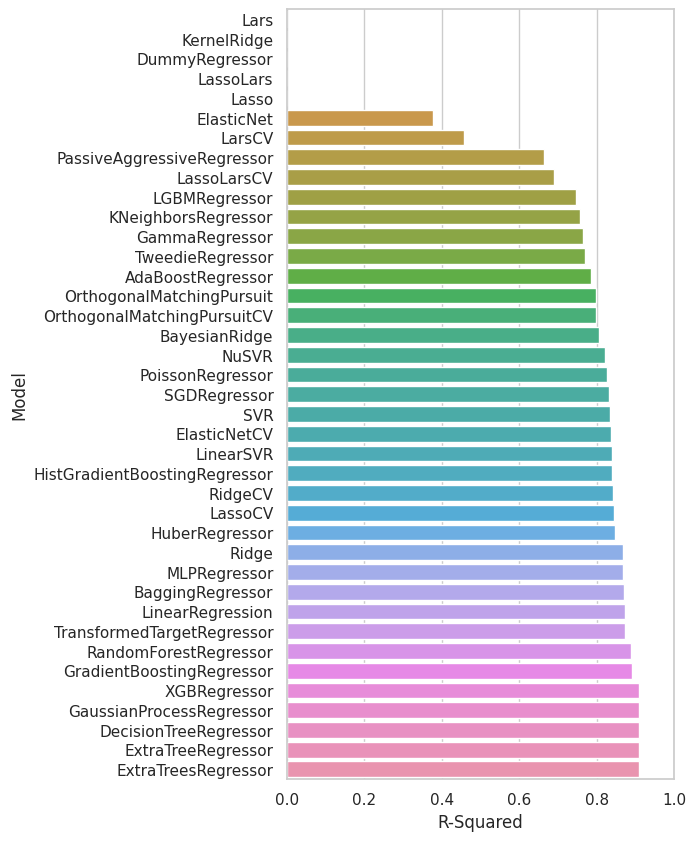

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

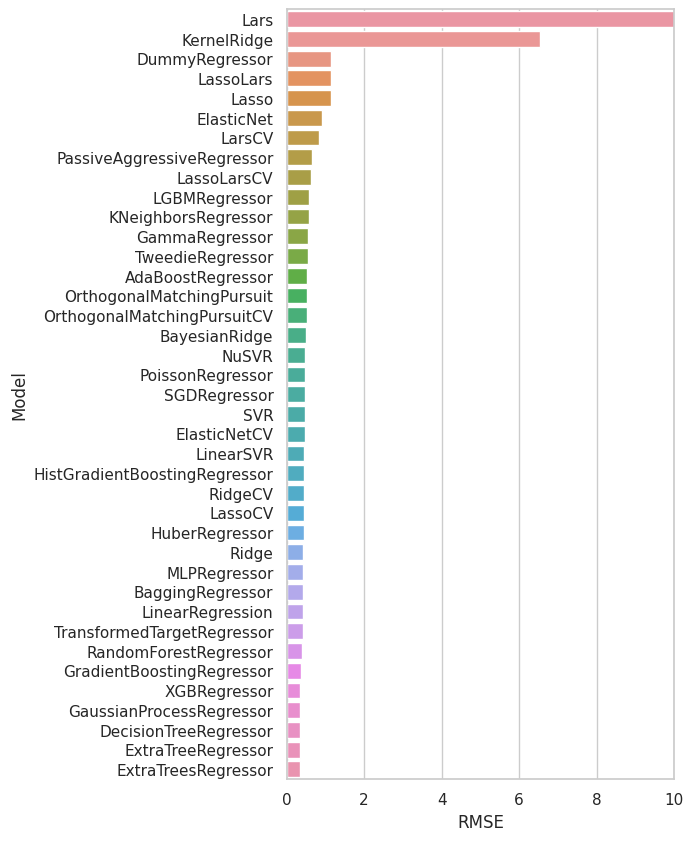

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

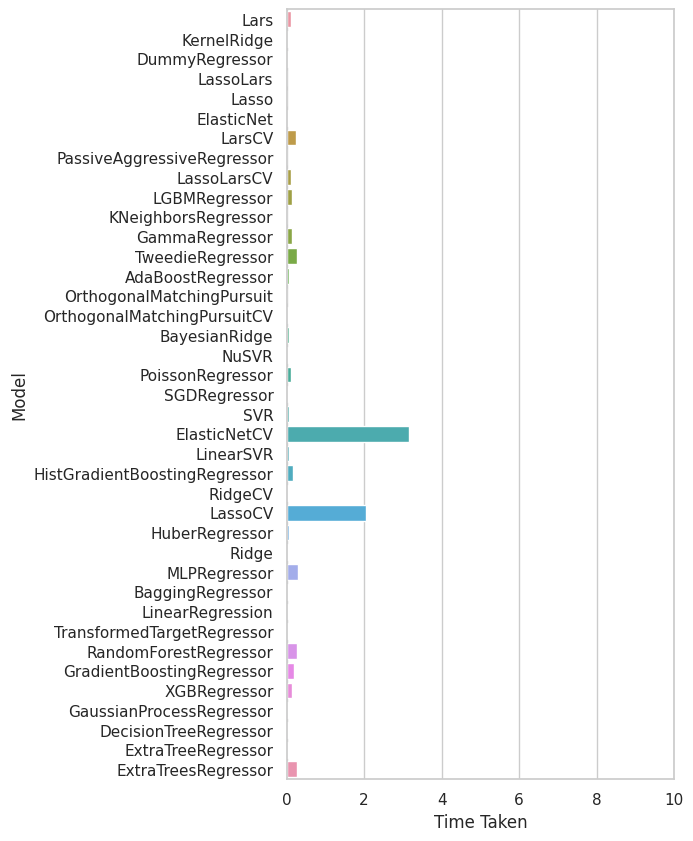

In [16]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))